In [143]:
#importar data de cancer de mama / import data breast cancer
from sklearn.datasets import load_breast_cancer
#importar modelo de selección / import models
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#importar librerias necesarias / import necesary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
#guardar data en una variable / save data in a variable
data = load_breast_cancer()

In [144]:
#información de la data importada / information of data used
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [145]:
#tamaño de la data / shape of data
data.data.shape

(569, 30)

In [146]:
#crear un data frame con pandas para visualizar lo que está contiene / create a data frame with pandas to visualize what it contains
df = pd.DataFrame(data.data, columns=data.feature_names)

In [147]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [148]:
df["target"] = data.target
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [149]:
#generar split entre test y train para usar en modelo / train data
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, random_state=11)

In [150]:
print(f"set de x_train es {x_train.shape}")
print(f"set de x_test es {x_test.shape}")

set de x_train es (426, 30)
set de x_test es (143, 30)


In [151]:
#modelo kneighborsclassifier / kneighboarsclassifier model
knn = KNeighborsClassifier()

In [169]:
#entrenar el modelo fit para cargar datos estimadores / train fit model to load estimator data
knn.fit(X=x_train, y=y_train)

KNeighborsClassifier(n_neighbors=10)

In [170]:
#crear la variable prediccion con knn.predict / create the prediction variable with knn.predict
prediccion = knn.predict(X=x_test)

In [171]:
#crear la variable esperada equivalente a y_test / create expected variable equivalent to y_test
esperado = y_test

In [172]:
#modelo prediccion tener en cuenta que 0 es benigno y 1 es maligno / prediction model take into account that 0 is benign and 1 is malignant
print(f"El modelo predictivo da como resultado: {prediccion[:10]}\nEl modelo esperado da como resultado: {esperado[:10]}\n podemos observar que de 10 pruebas mostradas nuestro modelo predictivo solo fallo el indice 6") 

El modelo predictivo da como resultado: [0 0 0 0 0 1 1 1 1 1]
El modelo esperado da como resultado: [0 0 0 0 0 1 0 1 1 1]
 podemos observar que de 10 pruebas mostradas nuestro modelo predictivo solo fallo el indice 6


In [173]:
#ubicar todas las veces que el modelo se equivoco en la prediccion con una funcion for / locate all the times the model was wrong in the prediction with a for function / locate all the times the model was wrong in the prediction with a for function
equivocados = [(p,e) for (p,e) in zip(prediccion,esperado) if p!=e]
equivocados

[(1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]

In [174]:
#estimador de desempeño del modelo utilizado / performance estimator of the model used
knn.score(x_test, y_test)

0.951048951048951

modelo predictivo kfold modelo de validación cruzada

In [175]:
#importar modelos / import models
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [176]:
#crear objeto kfold metodo de validación cruzada / create objet kfold cross validation method
kfold = KFold(n_splits=10, random_state= 11, shuffle=True)

In [177]:
#crear variable para probar modelo / create variable for test model
puntuacion = cross_val_score(estimator=knn, X=data.data, y=data.target, cv=kfold)

In [178]:
#porcentaje de efectividad del modelo predictivo / percentage of effectiveness of the predictive model
puntuacion.mean()

0.9349937343358394

In [179]:
#porcentaje desviación estandar variabilidad al rededor de la media / percent standard deviation variability around the mean
puntuacion.std()

0.026038056593009375

probar con otros modelos y comparar sus porcentajes para elegir el mejor modelo

In [180]:
#importar modelos svc y gaussian
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [181]:
#crear diccionario con modelos / create dictionaries whit models
estimadores = {"KNeighborsClassifier":knn,  "SVC":SVC(gamma="scale"), "GaussianNB":GaussianNB()}

In [182]:
#función para iterar y mostrar los resultados / function for iterate and show results
for nombrestimador, objetoestimador  in estimadores.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    puntuacion = cross_val_score(estimator=objetoestimador, X=data.data, y=data.target,cv=kfold)
    print(f"{nombrestimador:>20}" + f" puntuacion promedio = {puntuacion.mean():.2%}" + f"; Desviacion estandar = {puntuacion.std():.2%}")

KNeighborsClassifier puntuacion promedio = 93.50%; Desviacion estandar = 2.60%
                 SVC puntuacion promedio = 91.92%; Desviacion estandar = 3.52%
          GaussianNB puntuacion promedio = 93.85%; Desviacion estandar = 2.75%


In [198]:
#ajustar hiperparametros para aumentar exactitud / adjust hyperparameters to increase accuracy
for k in range(1,11):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    puntuacion = cross_val_score(estimator=knn, X=data.data, y=data.target,cv=kfold)
    print(f"k= {k:<20}; " + f"puntuacion promedio = {puntuacion.mean():.2%}; " + f"Desviacion estandar = {puntuacion.std():.2%}")

k= 1                   ; puntuacion promedio = 91.39%; Desviacion estandar = 2.76%
k= 2                   ; puntuacion promedio = 90.33%; Desviacion estandar = 2.39%
k= 3                   ; puntuacion promedio = 92.97%; Desviacion estandar = 1.56%
k= 4                   ; puntuacion promedio = 92.09%; Desviacion estandar = 2.97%
k= 5                   ; puntuacion promedio = 92.79%; Desviacion estandar = 2.01%
k= 6                   ; puntuacion promedio = 93.14%; Desviacion estandar = 2.29%
k= 7                   ; puntuacion promedio = 93.32%; Desviacion estandar = 2.19%
k= 8                   ; puntuacion promedio = 93.14%; Desviacion estandar = 2.16%
k= 9                   ; puntuacion promedio = 93.50%; Desviacion estandar = 2.72%
k= 10                  ; puntuacion promedio = 93.50%; Desviacion estandar = 2.60%


In [167]:
#calcular matris de correlación / calculate evaluation matrices
correlacion = df.corr()
correlacion.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560


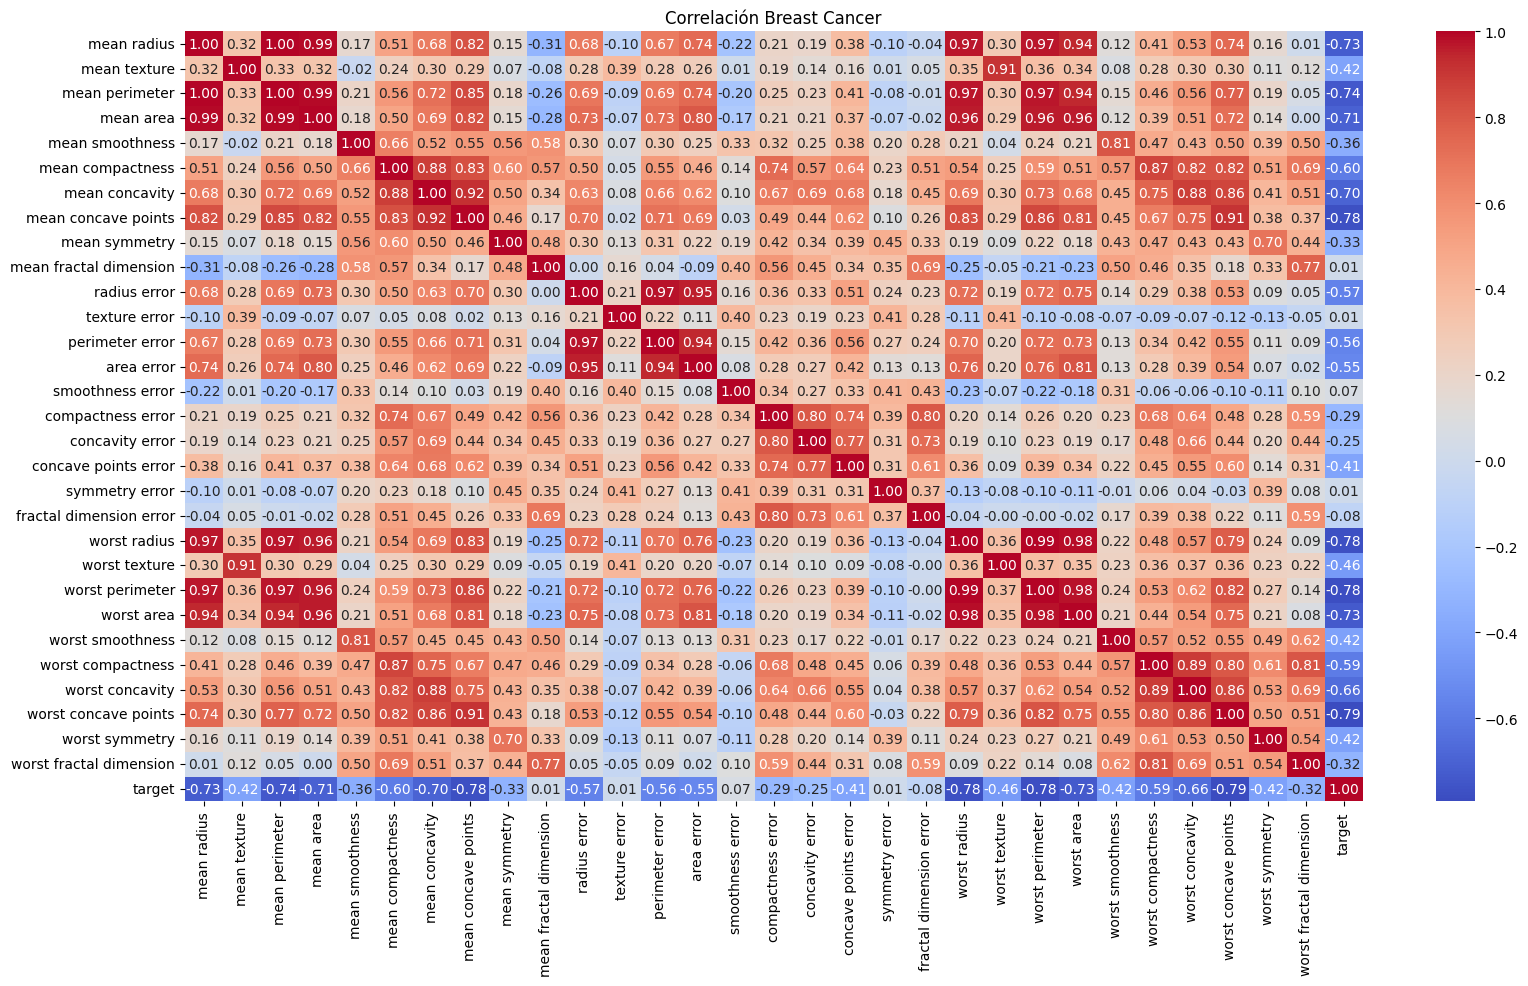

In [200]:
#crear mapa de calor / create heat map
plt.figure(figsize=(19,10))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación Breast Cancer")
plt.show()